In [6]:
import numpy as np
import pandas as pd
import os
import re

from packages import timeconvert as tc

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, FixedLocator,FormatStrFormatter

date = '7_25_2021'

timeRange = ["00","07"]

refants = np.array(['DA59','DV11','DA49','DV12','PM01','DV07'])

#'''

In [7]:
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

def colorbar(mappable,norm,vmin,vmax):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax, boundaries=[vmin,0.8*vmin,0.6*vmin,0.4*vmin,0.2*vmin,0,0.2*vmax,0.4*vmax,0.6*vmax,0.8*vmax,vmax],ticks=[vmin,0.5*vmin,0,0.5*vmax,vmax])
    cbar.set_label('(m)')
    plt.sca(last_axes)
    return cbar

uids = []
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        asdmXML = open(directory+file+'/ASDM.xml',"r")
        for i in range(4): line = asdmXML.readline()
        time = re.sub(r"<.*?>", "", line).strip()
        time = tc.UnixtoFormattedTime(tc.FormattedTimetoUnix(time))
        if float(timeRange[0]) <= float(time[7:9]) and float(time[7:9]) <= float(timeRange[1]):
            uids.append(file)

# offset magnitude

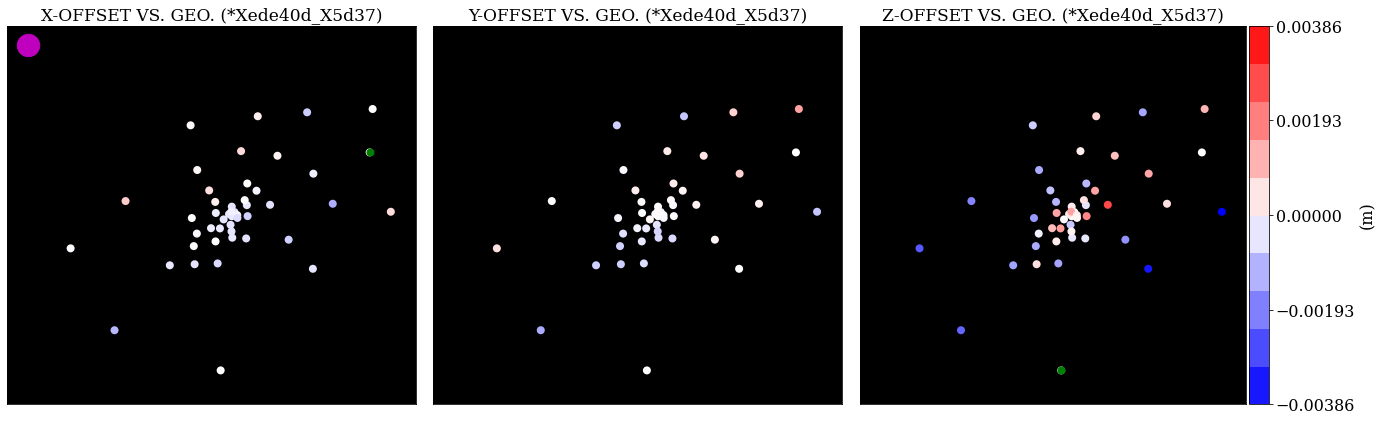

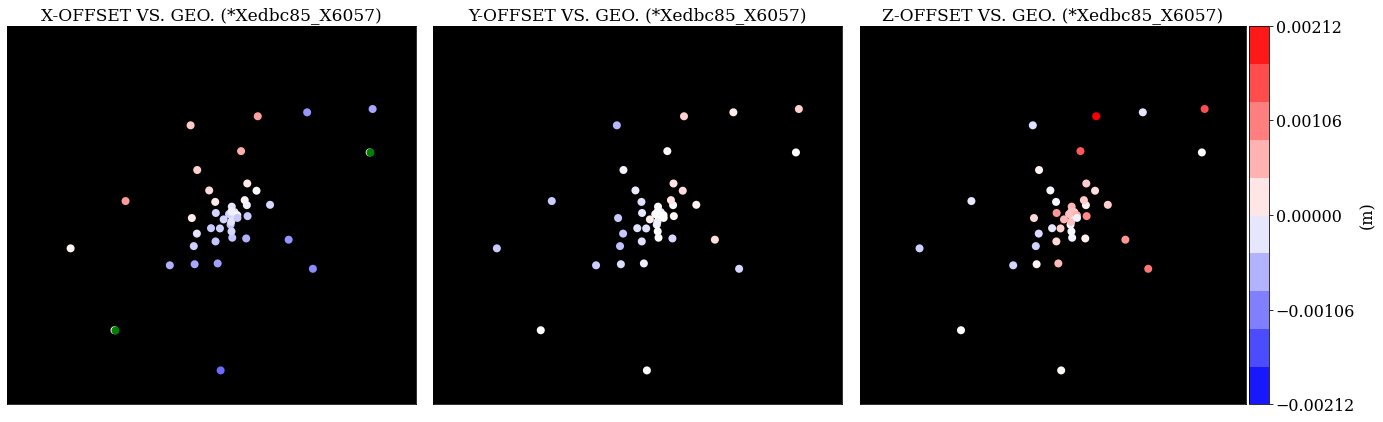

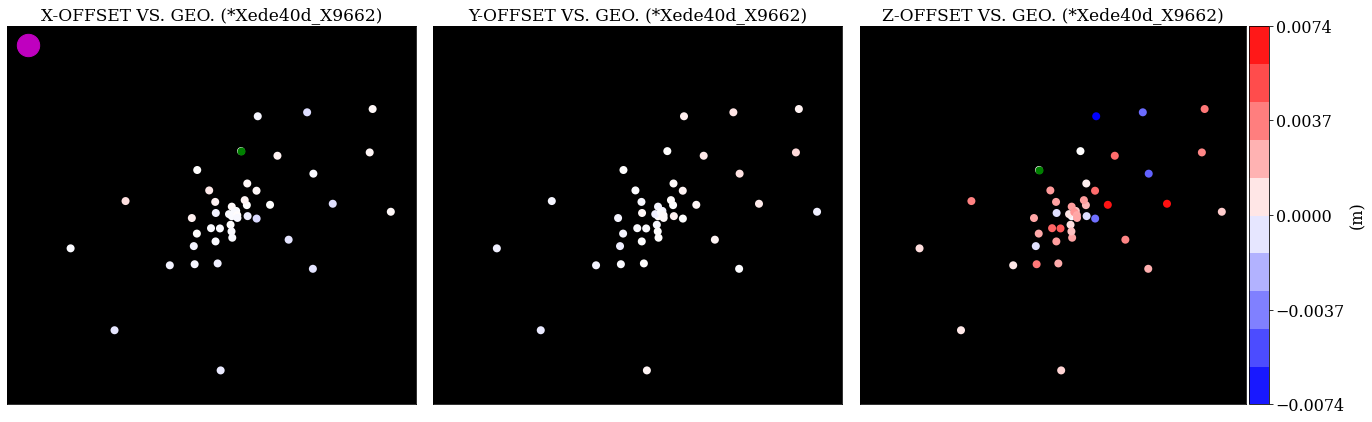

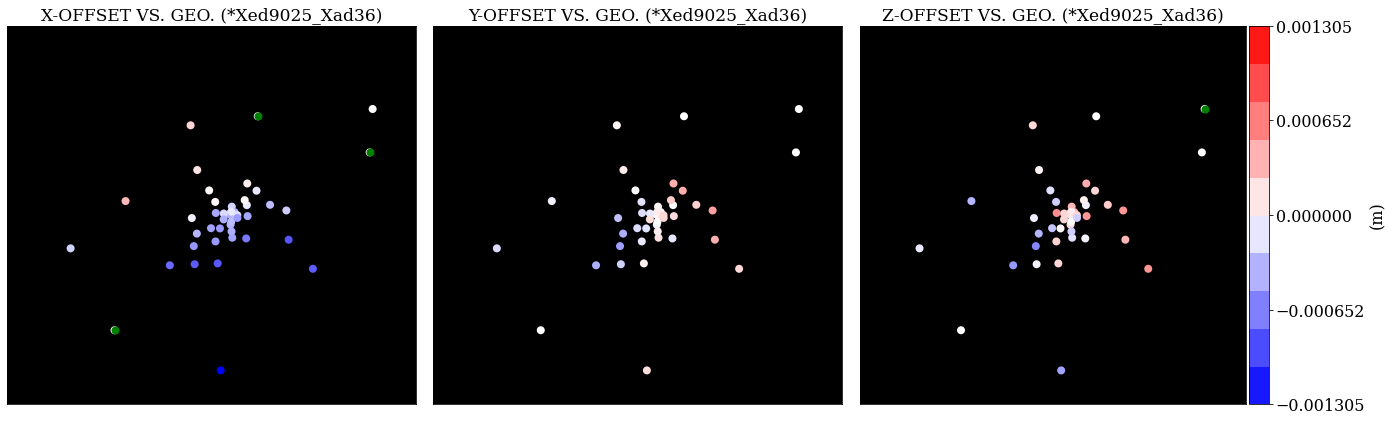

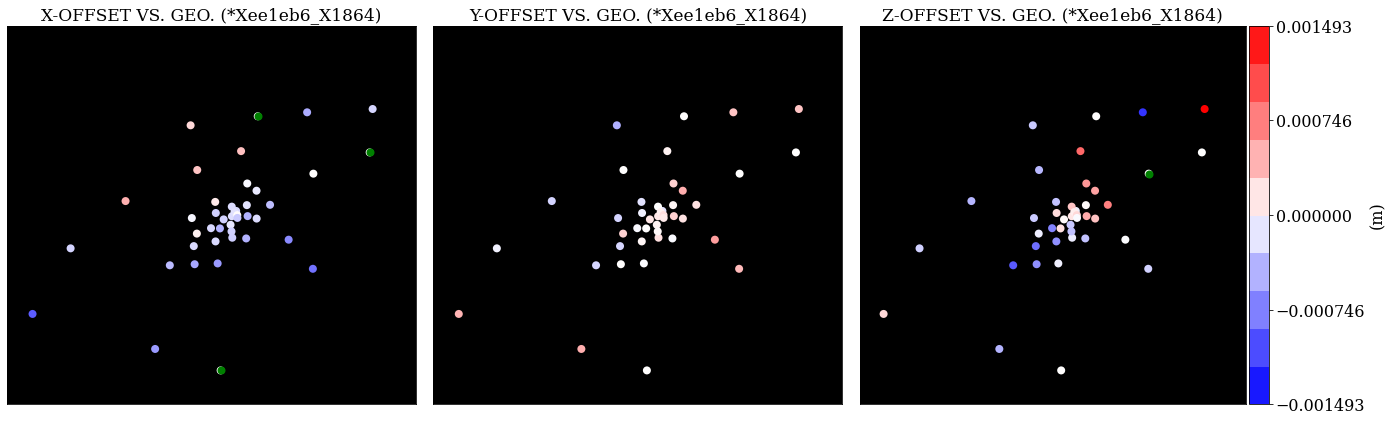

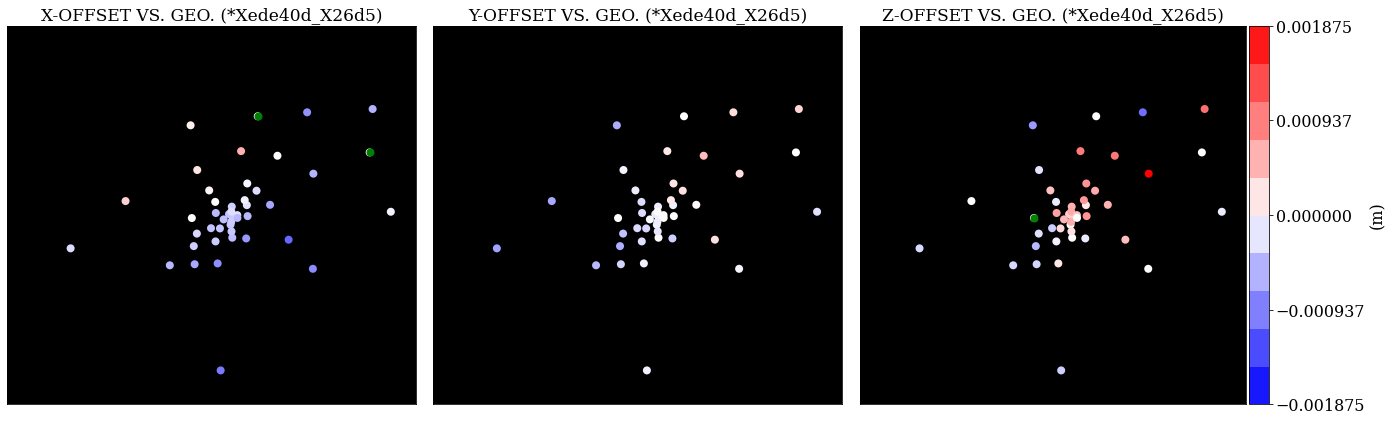

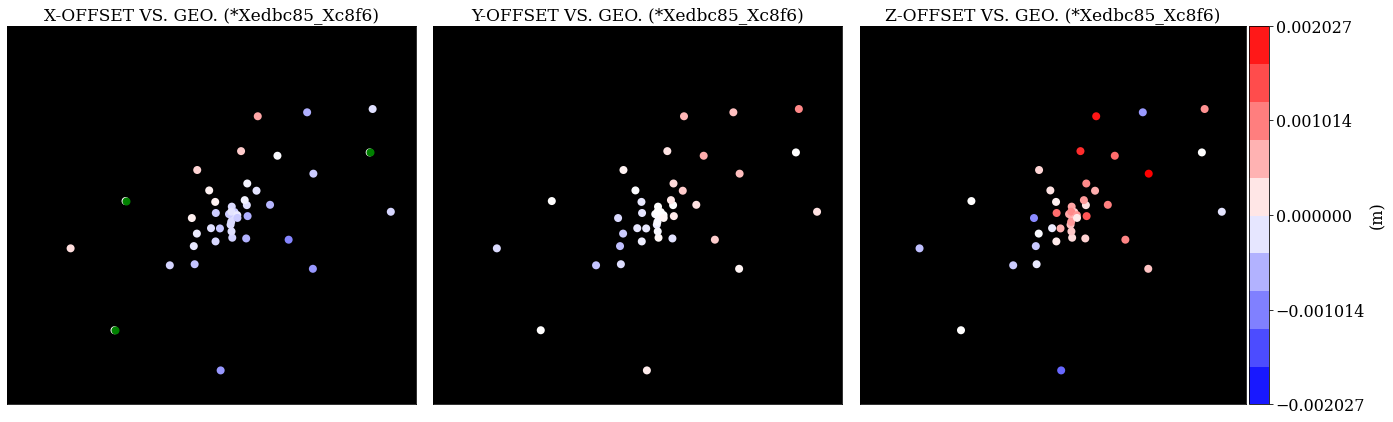

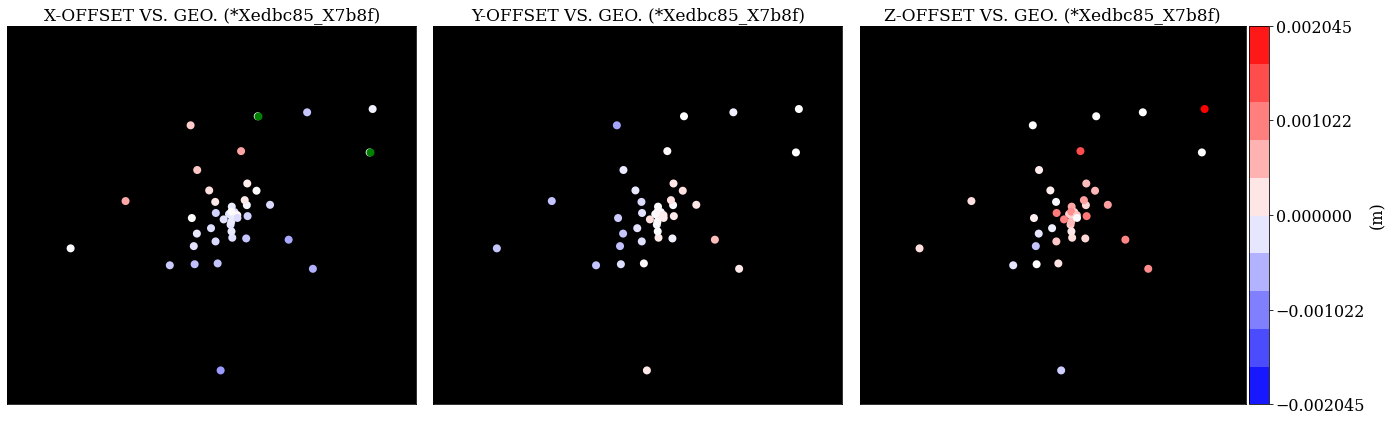

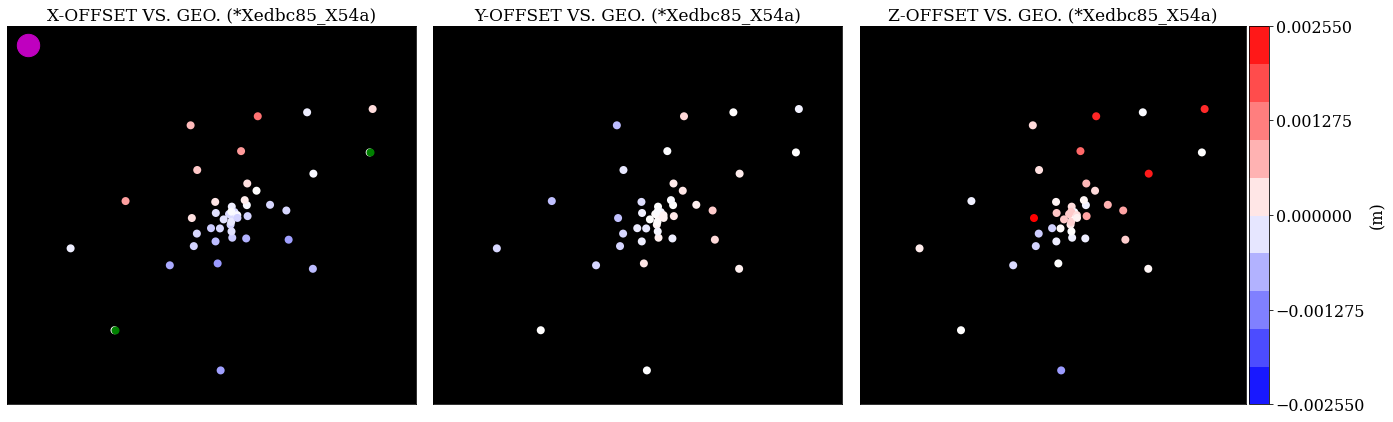

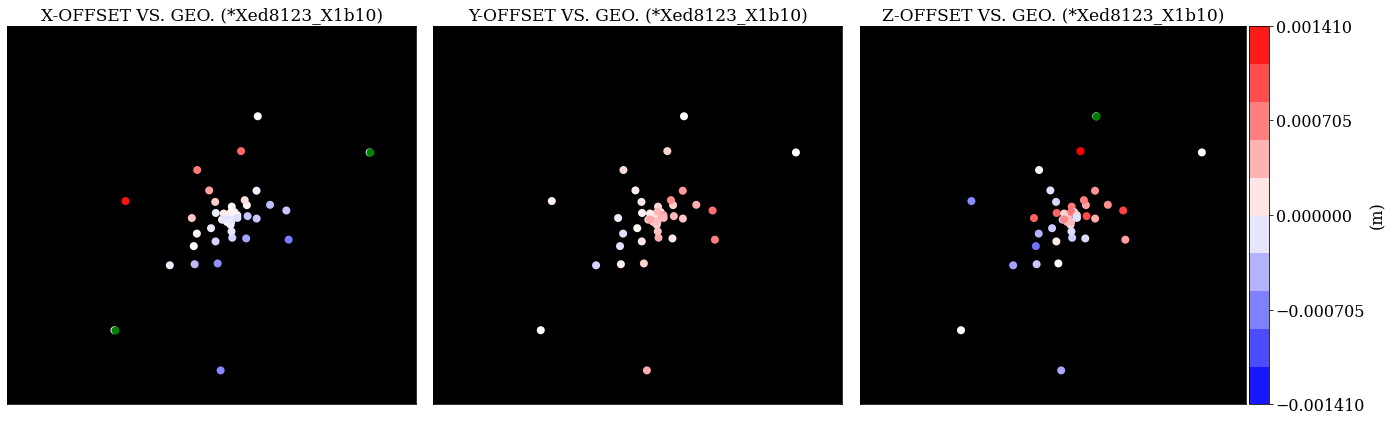

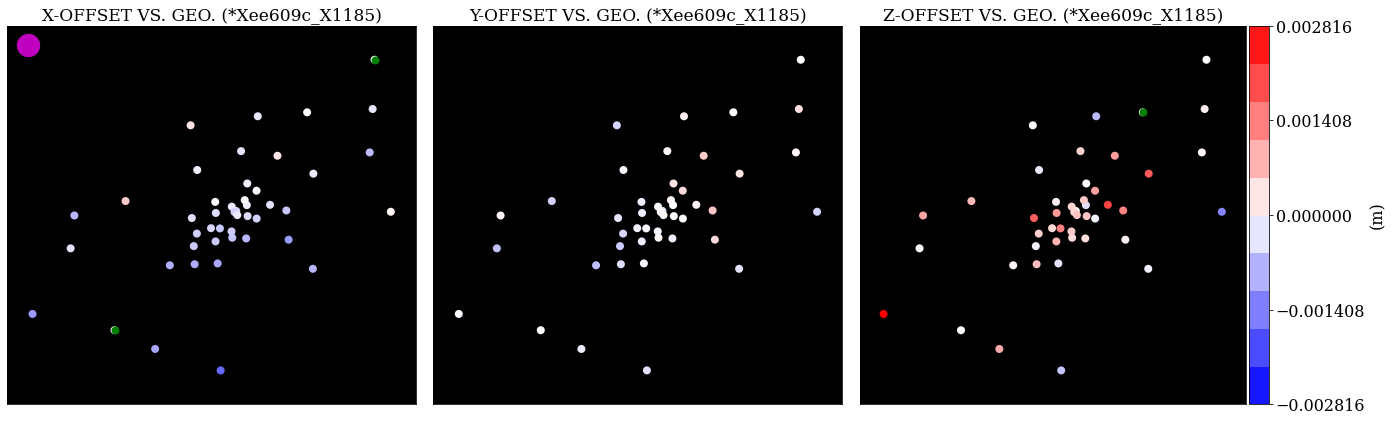

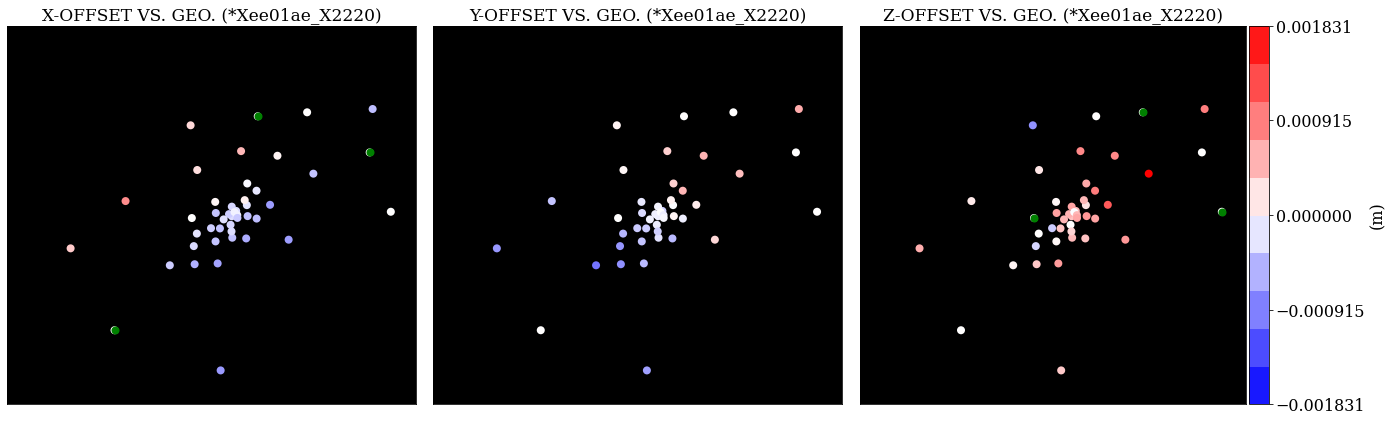

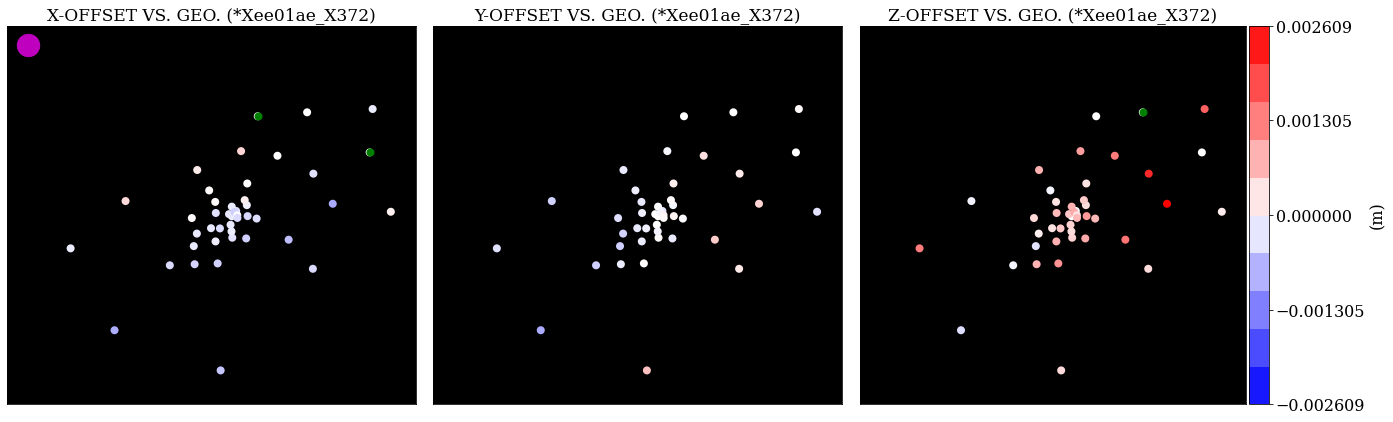

In [10]:
if not os.path.isdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/'):
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/magnitude/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/delta/')
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

weather = np.array([[2226292.373,2223475.222,2226146.018,2218047.888,2229937.944,2229279.046,2225008.773,2202176.215],[-5440071.187,-5440620.327,-5439167.973,-5442740.475,-5435387.75,-5440478.349,-5440202.705,-5445210.627]])

UpperLimitArrX = []
UpperLimitArrY = []
LowerLimitArrX = []
LowerLimitArrY = []
k = 0
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        if file in uids:
            temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
            pos = np.array((temp[:,3:]),dtype='float')
            UpperLimitArrX.append(np.max(pos[:,12]))
            UpperLimitArrY.append(np.max(pos[:,13]))
            LowerLimitArrX.append(np.min(pos[:,12]))
            LowerLimitArrY.append(np.min(pos[:,13]))
        k += 1
xMaxLim = max(UpperLimitArrX)+200
yMaxLim = max(UpperLimitArrY)+200
xMinLim = min(LowerLimitArrX)-200
yMinLim = min(LowerLimitArrY)-200

k = 0
o = 0
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        if file in uids:
            probs1 = np.empty((1,2),dtype='float')
            probs2 = np.empty((1,2),dtype='float')
            probs3 = np.empty((1,2),dtype='float')
            temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
            pos = np.array((temp[:,3:]),dtype='float')

            k = np.sort(pos[:,0])
            dev = (k[-4]-k[4])/2
            xmax = k[-4]+dev
            xmin = k[4]-dev

            k = np.sort(pos[:,1])
            dev = (k[-4]-k[4])/2
            ymax = k[-4]+dev
            ymin = k[4]-dev

            k = np.sort(pos[:,2])
            dev = (k[-4]-k[4])/2
            zmax = k[-4]+dev
            zmin = k[4]-dev


            for j in range(np.shape(pos)[0]):
                if pos[j,0] > xmax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs1 = np.vstack((probs1,temp))
                    pos[j,0:3] = 0
                if pos[j,1] > ymax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs2 = np.vstack((probs2,temp))
                    pos[j,0:3] = 0
                if pos[j,2] > zmax:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs3 = np.vstack((probs3,temp))
                    pos[j,0:3] = 0
                if pos[j,0] < xmin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs1 = np.vstack((probs1,temp))
                    pos[j,0:3] = 0
                if pos[j,1] < ymin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs2 = np.vstack((probs2,temp))
                    pos[j,0:3] = 0
                if pos[j,2] < zmin:
                    temp = np.empty((1,2),dtype='float')
                    temp[0,:] = pos[j,12:14]
                    probs3 = np.vstack((probs3,temp))
                    pos[j,0:3] = 0
            if np.shape(probs1)[0] != 1:
                probs1 = probs1[1:,:]
            else:
                probs1 = ""
            if np.shape(probs2)[0] != 1:
                probs2 = probs2[1:,:]
            else:
                probs2 = ""
            if np.shape(probs3)[0] != 1:
                probs3 = probs3[1:,:]
            else:
                probs3 = ""

            temp = max(np.max(pos[:,:3]),-np.min(pos[:,:3]))
            vmin = -temp
            vmax = temp
            if vmax > 0.002:
                circle = True
            else: circle = False
            norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)

            xmin, xmax = xMinLim,xMaxLim
            ymin, ymax = yMinLim,yMaxLim

            #graph parameters
            width,height = 18,6
            xMajors,xMinors = 5,5
            yMajors,yMinors = 5,5

            #X PLOT

            fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(width,height))

            title='X-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax1.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            ax1.scatter(pos[:,12],pos[:,13],norm=norm,c=pos[:,0],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs1) != str:
                ax1.scatter(probs1[:,0],probs1[:,1],color='g',linestyle='-',linewidth=2)
                
            if circle: ax1.scatter(xmin+0.05*(xmax-xmin),ymax-0.05*(ymax-ymin),s=500,c='m',edgecolors='m',linestyle='-',linewidth=1)
            ##########

            plt.rc("font", size=16,family='serif')
            ax1.set_xlim(xmin,xmax)
            ax1.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax1.set_xticks([xmin+200,xmax-200])
            ax1.set_yticks([ymin+200,ymax-200])
            ax1.xaxis.set_minor_locator(x_minor_ticks)
            ax1.yaxis.set_minor_locator(y_minor_ticks)
            ax1.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
            ax1.set_xticklabels(['West','East'])
            ax1.set_yticklabels(['South','North'])
            ax1.set_title(title,fontsize=17)
            ax1.set_facecolor('xkcd:black')
            plt.tight_layout()

            #Y PLOT

            title='Y-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax2.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            ax2.scatter(pos[:,12],pos[:,13],norm=norm,c=pos[:,1],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs2) != str:
                ax1.scatter(probs2[:,0],probs2[:,1],color='g',linestyle='-',linewidth=2)

            ##########

            plt.rc("font", size=16,family='serif')
            ax2.set_xlim(xmin,xmax)
            ax2.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax2.set_xticks([xmin+200,xmax-200])
            ax2.set_yticks([ymin+200,ymax-200])
            ax2.xaxis.set_minor_locator(x_minor_ticks)
            ax2.yaxis.set_minor_locator(y_minor_ticks)
            ax2.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
            ax2.set_xticklabels(['West','East'])
            ax2.set_yticklabels(['South','North'])
            ax2.set_title(title,fontsize=17)
            ax2.set_facecolor('xkcd:black')
            plt.tight_layout()

            #Z PLOT

            title='Z-OFFSET VS. GEO. (*'+file[11:]+')'

            #ax3.scatter(weather[0,:],weather[1,:],color='g',linestyle='-',linewidth=2)

            temp = ax3.scatter(pos[:,12],pos[:,13],norm=norm,c=pos[:,2],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
            if type(probs3) != str:
                ax3.scatter(probs3[:,0],probs3[:,1],color='g',linestyle='-',linewidth=2)
            ##########

            plt.rc("font", size=16,family='serif')
            ax3.set_xlim(xmin,xmax)
            ax3.set_ylim(ymin,ymax)
            x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
            y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
            ax3.set_xticks([xmin+200,xmax-200])
            ax3.set_yticks([ymin+200,ymax-200])
            ax3.xaxis.set_minor_locator(x_minor_ticks)
            ax3.yaxis.set_minor_locator(y_minor_ticks)
            ax3.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
            ax3.set_xticklabels(['West','East'])
            ax3.set_yticklabels(['South','North'])
            ax3.set_title(title,fontsize=17)
            ax3.set_facecolor('xkcd:black')
            plt.tight_layout()

            colorbar(temp,norm,vmin,vmax)
            plt.show()
            #plt.savefig(directory+'geographyplots/magnitude/maggeo'+str(o)+'.png', bbox_inches='tight')
            #plt.close()

            o += 1
        k += 1
        
#'''

# offset change (1-day average)

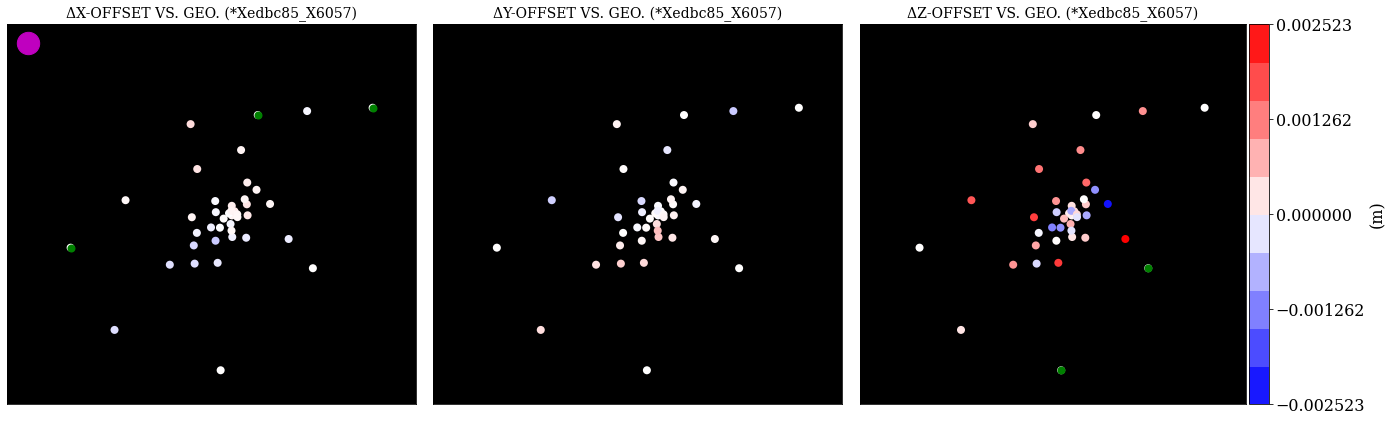

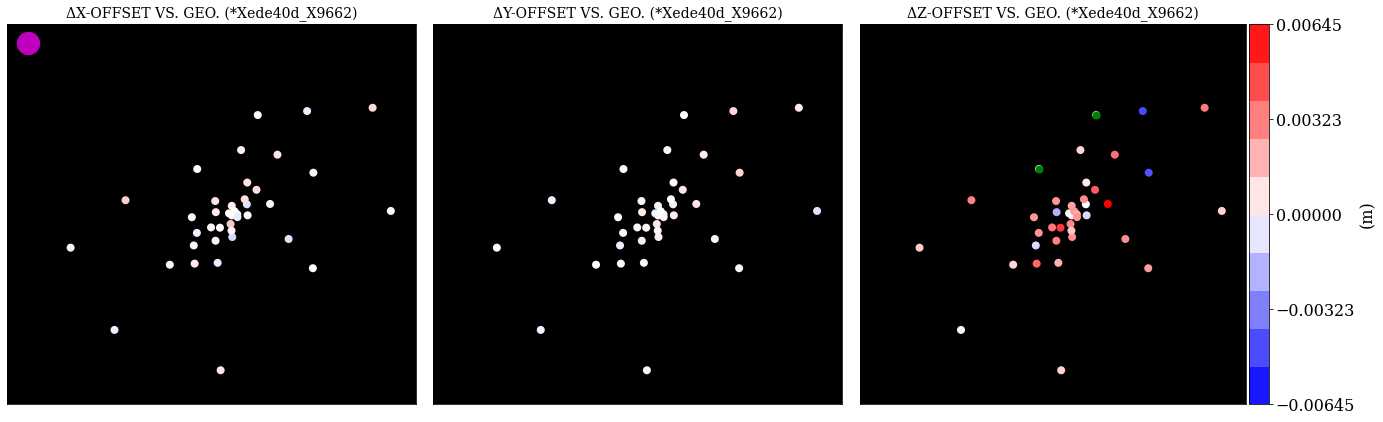

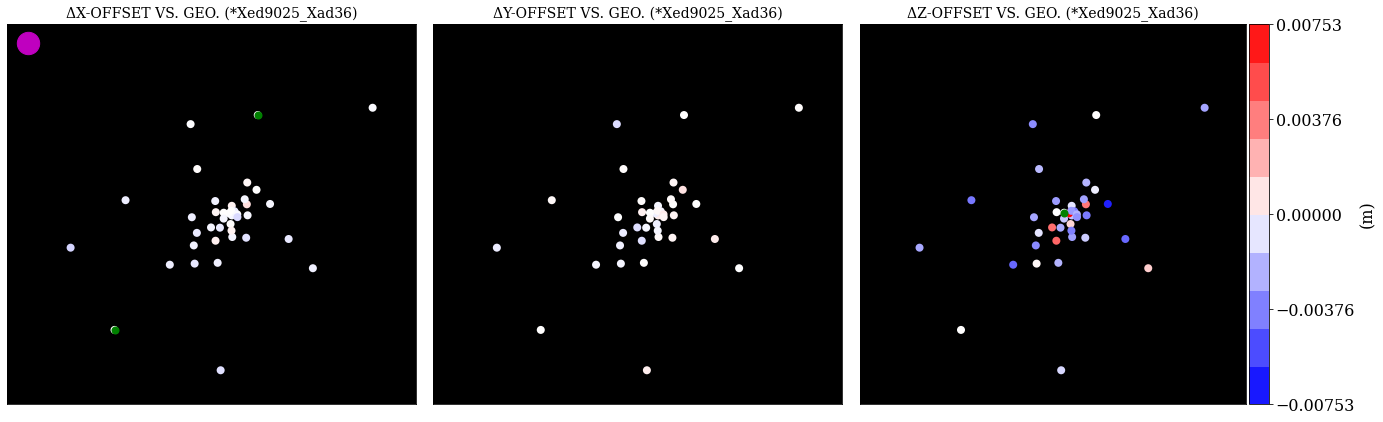

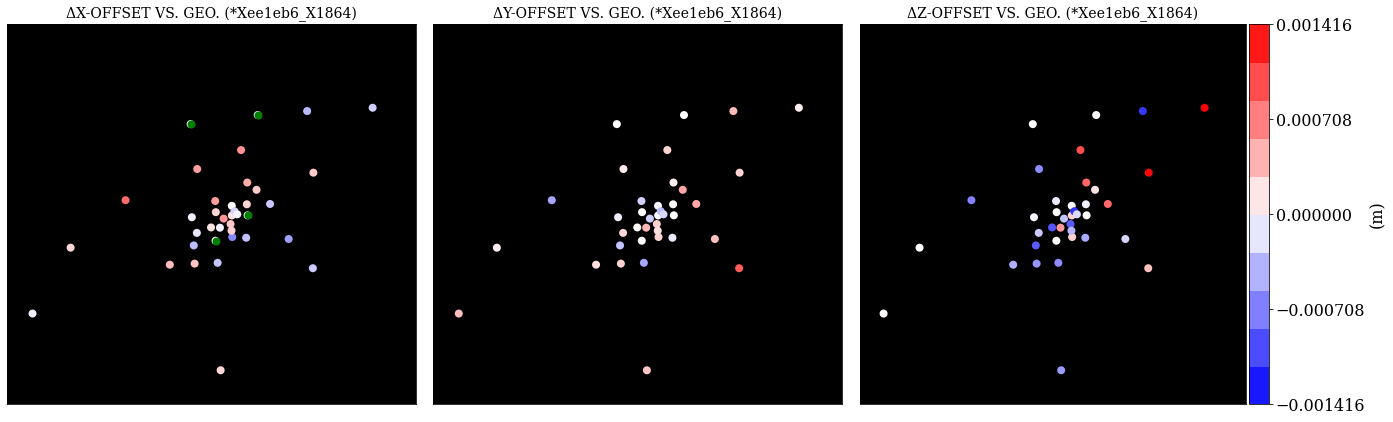

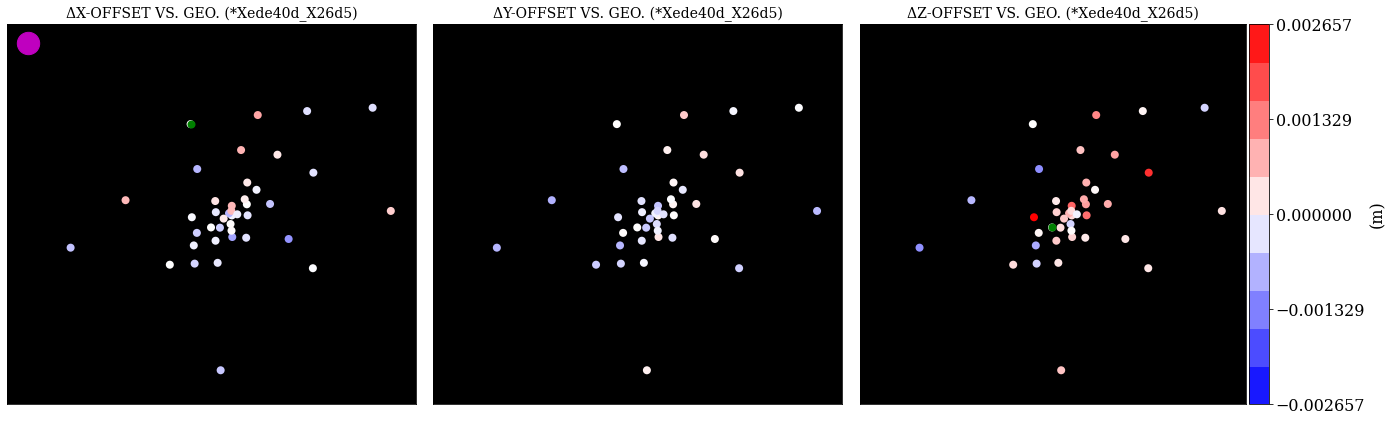

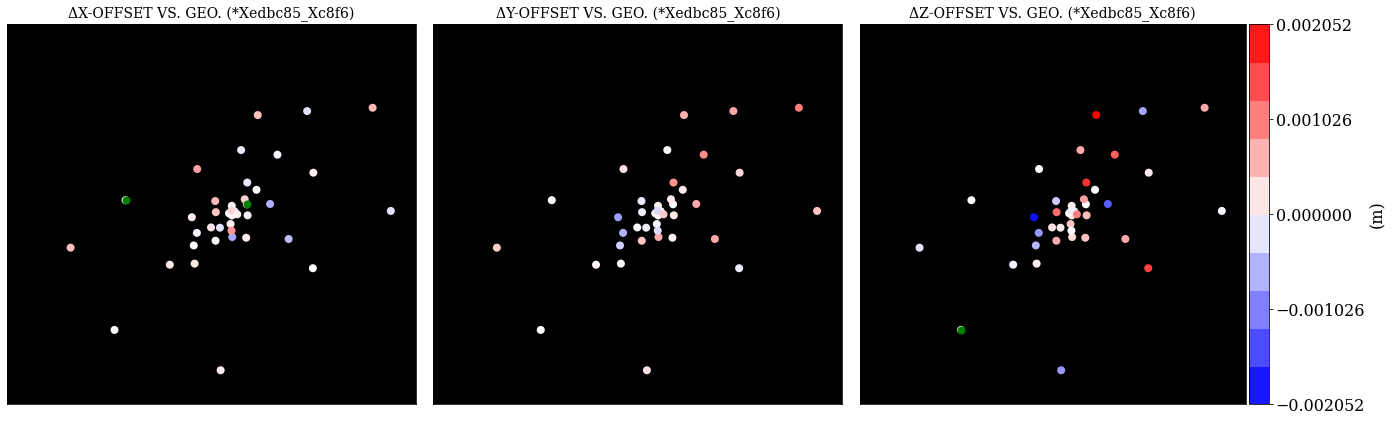

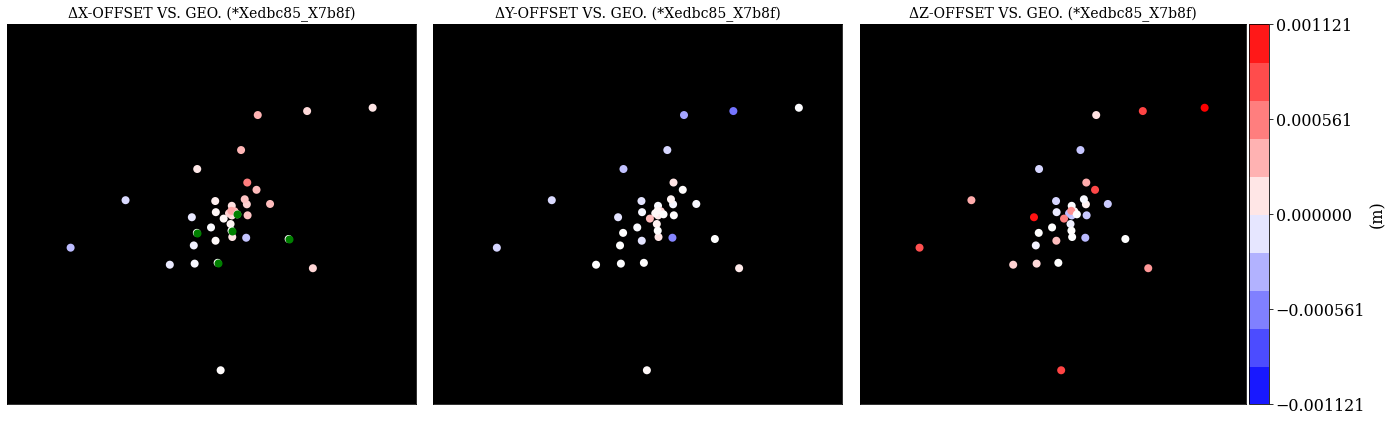

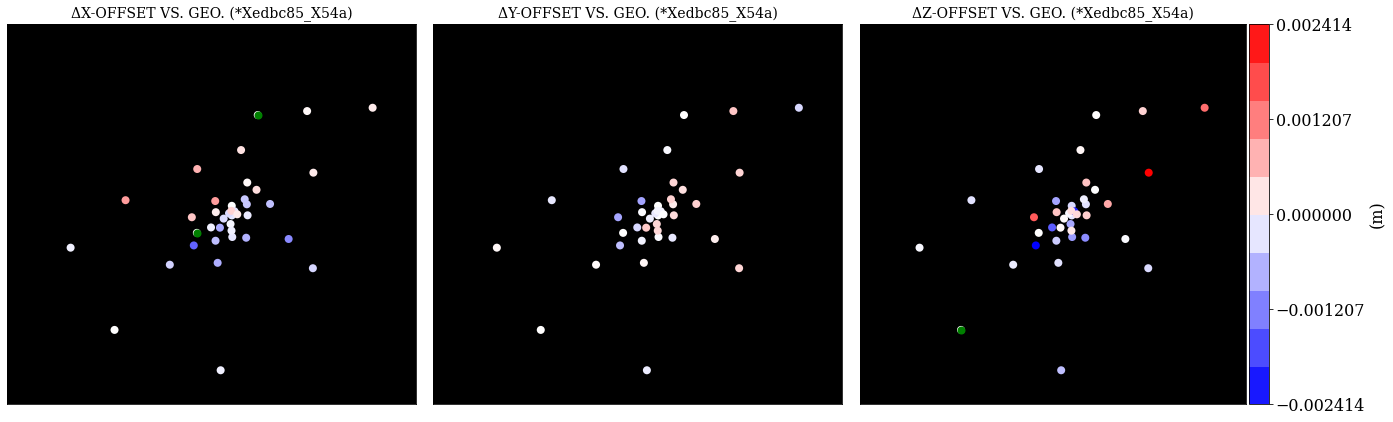

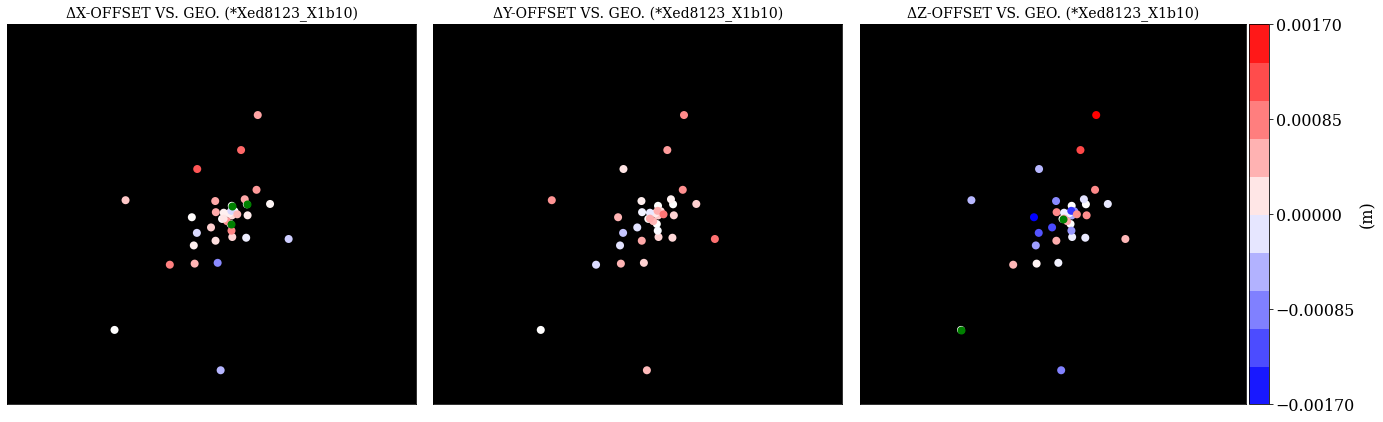

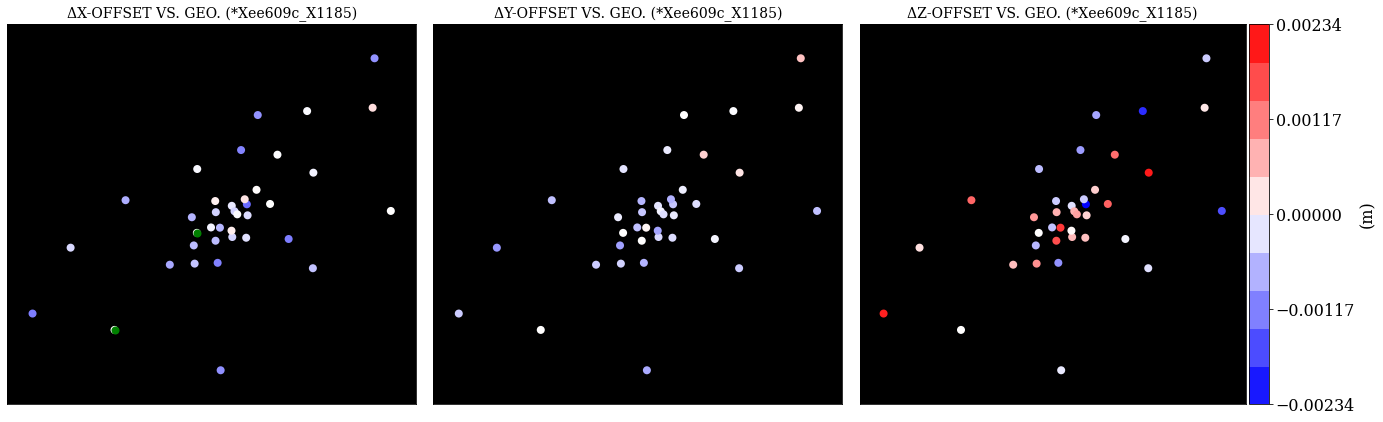

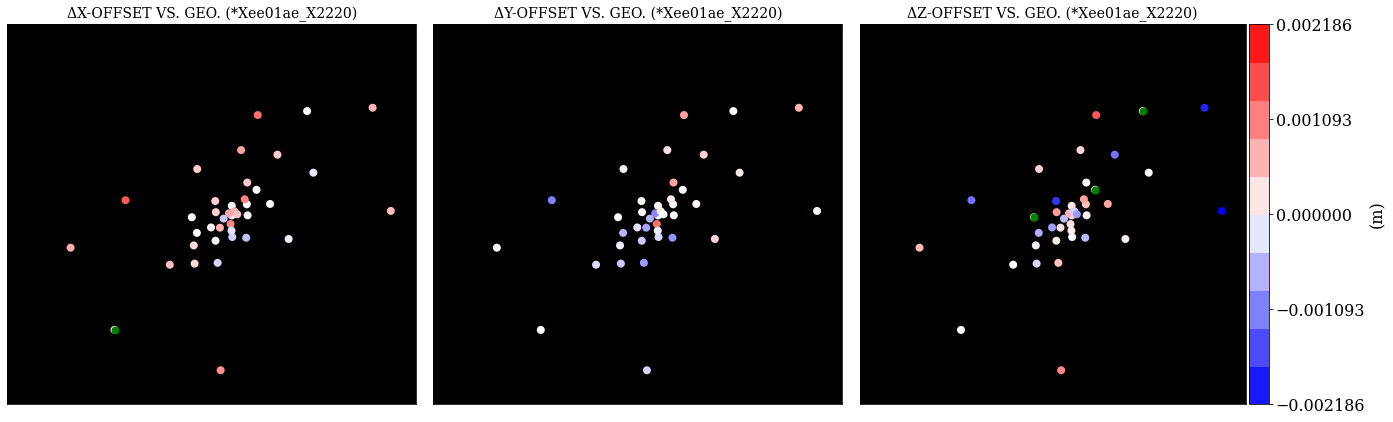

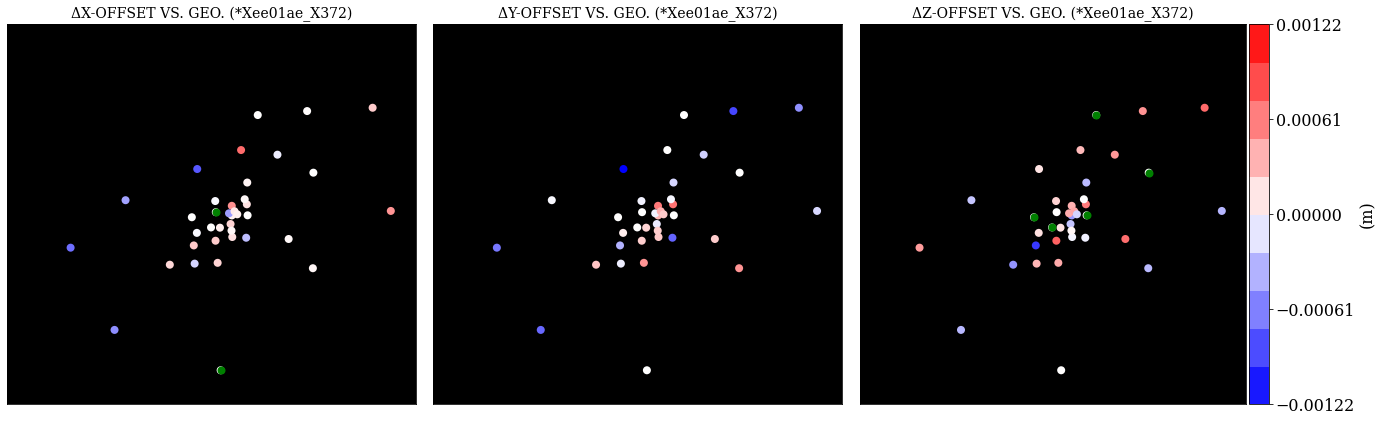

In [12]:
if not os.path.isdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/'):
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/magnitude/')
    os.mkdir('/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/geographyplots/delta/')
directory = '/Users/colemeyer/Documents/ALMA Internship/Observational Data/'+date+'/'

weather = np.array([[2226292.373,2223475.222,2226146.018,2218047.888,2229937.944,2229279.046,2225008.773,2202176.215],[-5440071.187,-5440620.327,-5439167.973,-5442740.475,-5435387.75,-5440478.349,-5440202.705,-5445210.627]])

k = 0
UpperLimitArrX = []
UpperLimitArrY = []
LowerLimitArrX = []
LowerLimitArrY = []
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        if file in uids:
            temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
            pos = np.array((temp[:,3:]),dtype='float')

            UpperLimitArrX.append(np.max(pos[:,12]))
            UpperLimitArrY.append(np.max(pos[:,13]))
            LowerLimitArrX.append(np.min(pos[:,12]))
            LowerLimitArrY.append(np.min(pos[:,13]))
xMaxLim = max(UpperLimitArrX)+200
yMaxLim = max(UpperLimitArrY)+200
xMinLim = min(LowerLimitArrX)-200
yMinLim = min(LowerLimitArrY)-200

o = 0
k = 0
first = True
for file in os.listdir(directory): ##for subdirectory in 7_12_2021
    if os.path.isdir(directory+file) and file[:3] == 'uid':
        if file in uids:
            if first:
                temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
                oldpos = np.array((temp[:,3:9]),dtype='float')
                oldpos[:,3:5] = temp[:,15:17]
                oldpos[:,5] = temp[:,18]
                oldposnames = temp[:,0]
                first = False
            else:
                #file = 'uid___A002_Xed8123_X1b10'
                probs1 = np.empty((1,2),dtype='float')
                probs2 = np.empty((1,2),dtype='float')
                probs3 = np.empty((1,2),dtype='float')
                temp = np.genfromtxt(directory+file+'/AntPos.csv',delimiter=',',dtype='str',skip_header=2)
                pos = np.array((temp[:,3:9]),dtype='float')
                pos[:,3:5] = temp[:,15:17]
                pos[:,5] = temp[:,18]
                posnames = temp[:,0]

                if np.shape(pos)[0] > np.shape(oldpos)[0]:
                    pos = pos[:np.shape(oldpos)[0],:]
                else:
                    oldpos = oldpos[:np.shape(pos)[0],:]
                pos1 = pos

                ###################

                arr = np.empty((1,6),dtype='float')

                for i in range(np.shape(pos)[0]):
                    for j in range(np.shape(oldpos)[0]):
                        if posnames[i] == oldposnames[j] and pos[i,5] != 0 and oldpos[i,5] != 0:
                            temp = np.empty((1,6),dtype='float')
                            temp[0,:3] = pos[i,:3]-oldpos[j,:3]
                            temp[0,3:] = pos[i,3:]
                            arr = np.vstack((arr,temp))        
                pos = arr[1:,:]
                oldpos = pos1

                ###################

                k = np.sort(pos[:,0])
                dev = (k[-4]-k[4])/2
                xmax = k[-4]+dev
                xmin = k[4]-dev

                k = np.sort(pos[:,1])
                dev = (k[-4]-k[4])/2
                ymax = k[-4]+dev
                ymin = k[4]-dev

                k = np.sort(pos[:,2])
                dev = (k[-4]-k[4])/2
                zmax = k[-4]+dev
                zmin = k[4]-dev


                for j in range(np.shape(pos)[0]):
                    if pos[j,0] > xmax:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs1 = np.vstack((probs1,temp))
                        pos[j,0:3] = 0
                    if pos[j,1] > ymax:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs2 = np.vstack((probs2,temp))
                        pos[j,0:3] = 0
                    if pos[j,2] > zmax:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs3 = np.vstack((probs3,temp))
                        pos[j,0:3] = 0
                    if pos[j,0] < xmin:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs1 = np.vstack((probs1,temp))
                        pos[j,0:3] = 0
                    if pos[j,1] < ymin:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs2 = np.vstack((probs2,temp))
                        pos[j,0:3] = 0
                    if pos[j,2] < zmin:
                        temp = np.empty((1,2),dtype='float')
                        temp[0,:] = pos[j,3:5]
                        probs3 = np.vstack((probs3,temp))
                        pos[j,0:3] = 0
                if np.shape(probs1)[0] != 1:
                    probs1 = probs1[1:,:]
                else:
                    probs1 = ""
                if np.shape(probs2)[0] != 1:
                    probs2 = probs2[1:,:]
                else:
                    probs2 = ""
                if np.shape(probs3)[0] != 1:
                    probs3 = probs3[1:,:]
                else:
                    probs3 = ""

                temp = max(np.max(pos[:,:3]),-np.min(pos[:,:3]))
                vmin = -temp
                vmax = temp
                if vmax > 0.002:
                    circle = True
                else: circle = False
                norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
                    
                xmin, xmax = xMinLim,xMaxLim
                ymin, ymax = yMinLim,yMaxLim

                #graph parameters
                width,height = 18,6
                xMajors,xMinors = 5,5
                yMajors,yMinors = 5,5

                #X PLOT

                fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(width,height))

                title='ΔX-OFFSET VS. GEO. (*'+file[11:]+')'

                ax1.scatter(pos[:,3],pos[:,4],norm=norm,c=pos[:,0],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
                if type(probs1) != str:
                    ax1.scatter(probs1[:,0],probs1[:,1],color='g',linestyle='-',linewidth=2)

                if circle: ax1.scatter(xmin+0.05*(xmax-xmin),ymax-0.05*(ymax-ymin),s=500,c='m',edgecolors='m',linestyle='-',linewidth=1)
                ##########

                plt.rc("font", size=16,family='serif')
                ax1.set_xlim(xmin,xmax)
                ax1.set_ylim(ymin,ymax)
                x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
                y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
                ax1.set_xticks([xmin+200,xmax-200])
                ax1.set_yticks([ymin+200,ymax-200])
                ax1.xaxis.set_minor_locator(x_minor_ticks)
                ax1.yaxis.set_minor_locator(y_minor_ticks)
                ax1.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
                ax1.set_xticklabels(['West','East'])
                ax1.set_yticklabels(['South','North'])
                ax1.set_title(title,fontsize=14)
                ax1.set_facecolor('xkcd:black')
                plt.tight_layout()

                #Y PLOT

                title='ΔY-OFFSET VS. GEO. (*'+file[11:]+')'

                ax2.scatter(pos[:,3],pos[:,4],norm=norm,c=pos[:,1],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
                if type(probs2) != str:
                    ax1.scatter(probs2[:,0],probs2[:,1],color='g',linestyle='-',linewidth=2)

                ##########

                plt.rc("font", size=16,family='serif')
                ax2.set_xlim(xmin,xmax)
                ax2.set_ylim(ymin,ymax)
                x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
                y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
                ax2.set_xticks([xmin+200,xmax-200])
                ax2.set_yticks([ymin+200,ymax-200])
                ax2.xaxis.set_minor_locator(x_minor_ticks)
                ax2.yaxis.set_minor_locator(y_minor_ticks)
                ax2.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
                ax2.set_xticklabels(['West','East'])
                ax2.set_yticklabels(['South','North'])
                ax2.set_title(title,fontsize=14)
                ax2.set_facecolor('xkcd:black')
                plt.tight_layout()

                #Z PLOT

                title='ΔZ-OFFSET VS. GEO. (*'+file[11:]+')'

                temp = ax3.scatter(pos[:,3],pos[:,4],norm=norm,c=pos[:,2],cmap=plt.cm.bwr,linestyle='-',linewidth=2)
                if type(probs3) != str:
                    ax3.scatter(probs3[:,0],probs3[:,1],color='g',linestyle='-',linewidth=2)
                ##########

                plt.rc("font", size=16,family='serif')
                ax3.set_xlim(xmin,xmax)
                ax3.set_ylim(ymin,ymax)
                x_minor_ticks = MultipleLocator(((xmax - xmin) / xMajors) / xMinors)
                y_minor_ticks = MultipleLocator(((ymax - ymin) / yMajors) / yMinors)
                ax3.set_xticks([xmin+200,xmax-200])
                ax3.set_yticks([ymin+200,ymax-200])
                ax3.xaxis.set_minor_locator(x_minor_ticks)
                ax3.yaxis.set_minor_locator(y_minor_ticks)
                ax3.tick_params(axis='both',which='both',bottom=False,top=False,right=False,left=False,labelleft=False,labelbottom=False)
                ax3.set_xticklabels(['West','East'])
                ax3.set_yticklabels(['South','North'])
                ax3.set_title(title,fontsize=14)
                ax3.set_facecolor('xkcd:black')
                plt.tight_layout()

                colorbar(temp,norm,vmin,vmax)
                plt.show()
                #plt.savefig(directory+'geographyplots/delta/deltageo'+str(o)+'.png', bbox_inches='tight')
                #plt.close()

                o += 1
        
#'''